In [1]:
from string import ascii_letters
import numpy as np
import pylab
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load relevant datasets and information

In [2]:
orig_pocp = 'brady_pocp_table.tab'
op = pd.read_csv(orig_pocp, sep='\t', index_col=0)
op.head()

,USDA110,B_japonicum_USDA_110,B_diazoefficiens_USDA_110,B_diazoefficiensY21,B_japonicumIs-1,B_japonicum_USDA_122_YUE,B_diazoefficiens_SEMIA_5080,B_diazoefficiensUSDA_122,B_diazoefficiens_NK6,B_sp._CCBAU_15615,...,B_sp._STM_3843,B_erythrophleiGAS401,B_erythrophleiGAS478,B_sp._URHD0069_N554,B_sp._NFR13,B_sp._CCH4-A6_CCH4-A6,B_sp._CCH10-C7_CCH10-C7,24,B_sp._CCH5-A9_CCH5-A9,B_sp._CCH1-B1_CCH1-B1
strain,,,,,,,,,,,,,,,,,,,,,
USDA110,100.00,100.00,97.04,92.03,90.76,90.60,91.01,91.10,80.82,79.90,...,65.49,57.96,58.99,55.98,60.45,51.68,52.34,62.09,39.83,37.93
B_japonicum_USDA_110,100.00,100.00,97.03,92.03,90.76,90.60,91.01,91.09,80.83,79.90,...,65.49,57.96,58.99,55.97,60.44,51.68,52.34,62.10,39.82,37.92
B_diazoefficiens_USDA_110,97.04,97.03,100.00,94.53,93.03,92.99,93.17,93.30,82.67,81.16,...,66.06,58.63,59.96,56.72,60.39,51.56,52.11,62.61,38.94,37.14
B_diazoefficiensY21,92.03,92.03,94.53,100.00,93.42,93.40,93.37,93.30,82.35,79.96,...,65.84,58.38,59.57,57.00,60.75,51.58,52.06,62.23,39.01,37.15
B_japonicumIs-1,90.76,90.76,93.03,93.42,100.00,99.69,99.65,99.52,83.72,80.81,...,66.65,59.16,60.06,57.84,61.59,52.22,52.68,63.28,39.35,37.51


In [3]:
sourmash_aai = 'output.pocp/brady.protein.sc5.compare'
sa = np.load(open(sourmash_aai, 'rb'))
labeltext = [x.strip() for x in open(sourmash_aai + '.labels.txt')]
print(labeltext[:5])

['05LoS14_6', '05LoS16R10_32', '05LoS16R10_36', '05LoS16R1_16', '05LoS16R2_18']


In [4]:
sd = pd.DataFrame(sa, columns = labeltext, index = labeltext)
sd.head()

,05LoS14_6,05LoS16R10_32,05LoS16R10_36,05LoS16R1_16,05LoS16R2_18,05LoS16R3_25,05LoS1_4,05LoS1_5,05LoS1_7,05LoS21R6_43,...,CW10,CW11,CW12,CW17,CW4,CW7,CW9,USDA110,USDA6,br56_10262016
05LoS14_6,1.000000,0.999766,0.979948,0.956344,0.975036,0.977800,0.957566,0.975710,0.979953,0.957001,...,0.959013,0.957394,0.908979,0.908979,0.957781,0.957025,0.956791,0.907835,0.909548,0.957328
05LoS16R10_32,0.999766,1.000000,0.979811,0.956138,0.974887,0.977909,0.957343,0.975688,0.979818,0.957132,...,0.959038,0.957417,0.908998,0.908998,0.957771,0.957136,0.956820,0.907874,0.909589,0.957322
05LoS16R10_36,0.979948,0.979811,1.000000,0.956284,0.976777,0.977577,0.957206,0.976239,0.999853,0.956553,...,0.958539,0.956827,0.909813,0.909813,0.957260,0.956314,0.955558,0.909337,0.910854,0.957284
05LoS16R1_16,0.956344,0.956138,0.956284,1.000000,0.952482,0.952864,0.991550,0.955045,0.956238,0.984029,...,0.983340,0.982595,0.909444,0.909444,0.979924,0.981110,0.982858,0.905597,0.907446,0.982296
05LoS16R2_18,0.975036,0.974887,0.976777,0.952482,1.000000,0.981286,0.953417,0.973890,0.976750,0.952344,...,0.954501,0.953061,0.908407,0.908407,0.952632,0.951742,0.952170,0.910898,0.913635,0.953390


## stack each matrix

In [5]:
op_stack = op.stack().reset_index()
op_stack.columns = ['gA', 'gB', 'POCP']
# op_stack = op_stack[op_stack['gA'] != op_stack['gB']]  # Remove the diagonal
op_stack.head()

,gA,gB,POCP
0,USDA110,USDA110,100.00
1,USDA110,B_japonicum_USDA_110,100.00
2,USDA110,B_diazoefficiens_USDA_110,97.04
3,USDA110,B_diazoefficiensY21,92.03
4,USDA110,B_japonicumIs-1,90.76


In [6]:
sa_stack = sd.stack().reset_index()
sa_stack.columns = ['gA', 'gB', 'cAAI']
#muplitply by 100 to get percentage
sa_stack['cAAI'] = sa_stack['cAAI'] * 100
# sa_stack = sa_stack[sa_stack['gA'] != sa_stack['gB']]  # Remove the diagonal
sa_stack.head()

,gA,gB,cAAI
0,05LoS14_6,05LoS14_6,100.000000
1,05LoS14_6,05LoS16R10_32,99.976571
2,05LoS14_6,05LoS16R10_36,97.994811
3,05LoS14_6,05LoS16R1_16,95.634429
4,05LoS14_6,05LoS16R2_18,97.503584


In [7]:
sa_stack.shape

(67081, 3)

In [8]:
op_stack.shape

(67081, 3)

## merge pocp and aai info

In [9]:
#merge sa_stack and op_stack
merged = pd.merge(sa_stack, op_stack, on=['gA', 'gB'])
merged.shape

(67081, 4)

In [10]:
# remove the diagonal
merged = merged[merged['gA'] != merged['gB']]
merged.shape

(66822, 4)

In [11]:
merged.head()

,gA,gB,cAAI,POCP
1,05LoS14_6,05LoS16R10_32,99.976571,99.74
2,05LoS14_6,05LoS16R10_36,97.994811,90.58
3,05LoS14_6,05LoS16R1_16,95.634429,85.10
4,05LoS14_6,05LoS16R2_18,97.503584,86.97
5,05LoS14_6,05LoS16R3_25,97.779972,88.84


# Compare POCP with sourmash compare

 - sourmash compare was run with protein k=10, scaled=5 signatures 

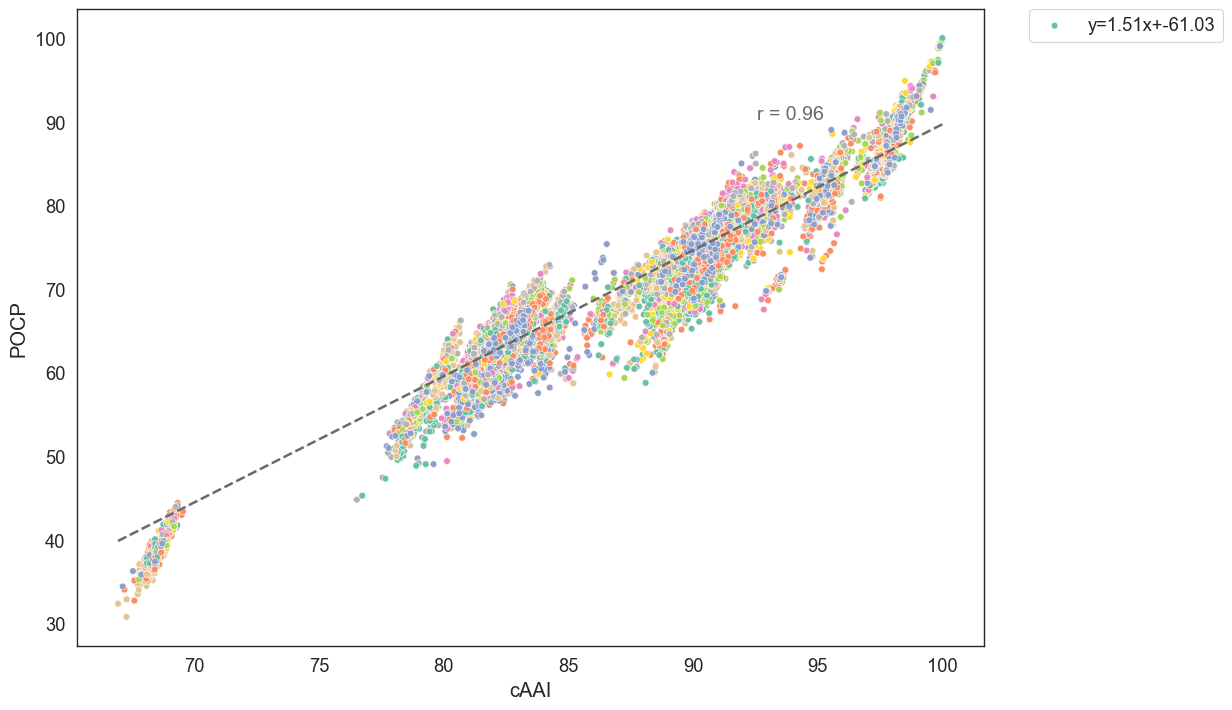

In [12]:
# plot scatterplot with seaborn
#sns.set_theme(style="ticks")
sns.set(style='white', rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", font_scale=1.5)
# scatterplot but dont include labels in legend
sns.scatterplot(data=merged, x="cAAI", y="POCP", hue="gA", legend=False, palette="Set2")
# add dashed linear regression line
#sns.regplot(data=merged, x="AAI", y="POCP", scatter=False, color=".2", line_kws={'linestyle':'--'})
# add dashed regression line to plot, print equation above line
sns.regplot(data=merged, x="cAAI", y="POCP", scatter=False, color="dimgray", 
            line_kws={'linestyle':'--'}, 
            label='y={0:.2f}x+{1:.2f}'.format(*np.polyfit(merged['cAAI'], merged['POCP'], 1)))
# compute correlation coefficient
corr = merged['cAAI'].corr(merged['POCP'], method='pearson')

# print correlation coefficient on bottom right of plot
plt.text(0.75, 0.85, 'r = {0:.2f}'.format(corr), transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', color='dimgray')


# only show legend for regression line
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           labels=['y={0:.2f}x+{1:.2f}'.format(*np.polyfit(merged['cAAI'], merged['POCP'], 1))])
plt.savefig('plots/POCP-vs-cANI.png')


## Plot sourmash compare (protein k=10; scaled=5)

In [13]:
from sourmash import fig

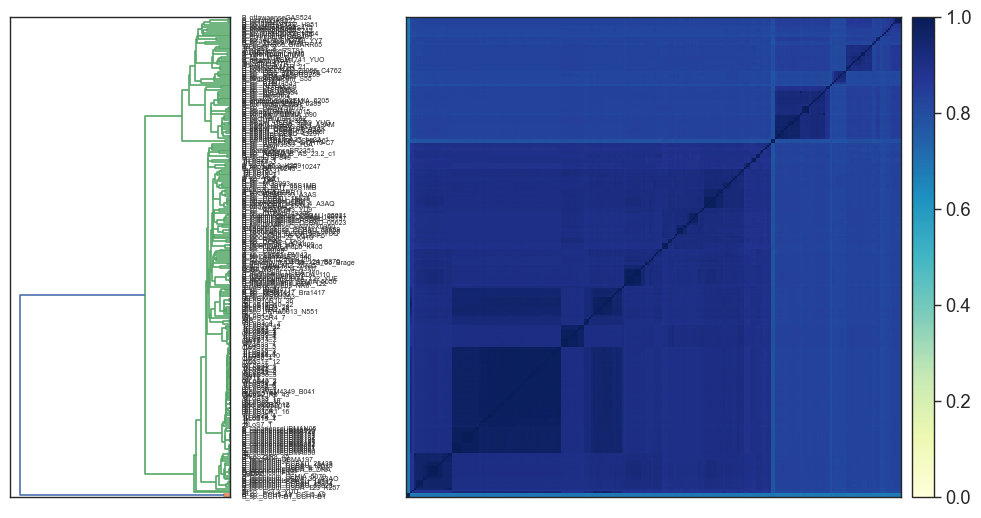

In [14]:
# load the comparison data
matrix, labels = fig.load_matrix_and_labels('output.pocp/brady.protein.sc5.compare')
# plot the matrix
f, reordered_labels, reordered_matrix = fig.plot_composite_matrix(matrix, labels)

In [15]:
# plot the histogram
D_filename = 'output.pocp/brady.protein.sc5.compare'
#labelfilename = D_filename + '.labels.txt'
D = np.load(open(D_filename, 'rb'))

(array([6.000e+00, 1.000e+01, 4.000e+01, 1.440e+02, 3.420e+02, 3.420e+02,
        1.300e+02, 1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.400e+01, 6.200e+01, 2.620e+02, 3.780e+02,
        1.680e+02, 9.000e+01, 1.080e+02, 2.640e+02, 1.840e+02, 2.500e+02,
        6.900e+02, 8.160e+02, 1.160e+03, 2.114e+03, 2.426e+03, 4.436e+03,
        6.852e+03, 5.210e+03, 1.908e+03, 7.340e+02, 5.100e+02, 2.780e+02,
        9.600e+01, 2.400e+01, 1.800e+01, 2.800e+01, 8.400e+01, 5.200e+01,
        8.600e+01, 1.780e+02, 9.600e+01, 9.200e+01, 1.420e+02, 4.900e+02,
        9.460e+02, 1.414e+03, 1.824e+03, 3.112e+03, 3.362e+03, 4.622e+03,
        6.620e+03, 2.820e+03, 1.820e+03, 7.140e+02, 4.320e+02, 5.840e+02,
        4.480e+02, 3.300e+02, 1.460e+0

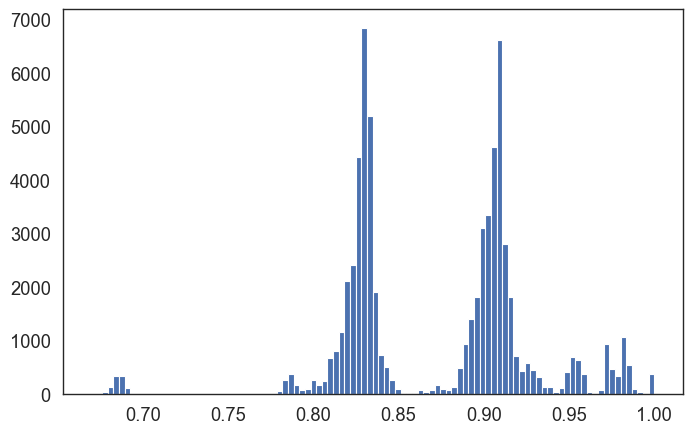

In [16]:
fig = pylab.figure(figsize=(8,5))
pylab.hist(np.array(D.flat), bins=100)